# Competition Details

Hosted by - HackerEarth - June 2021

Dataset and Problem - https://www.kaggle.com/infernape/fast-furious-and-insured

__notebooks__:
- https://www.kaggle.com/ashuto7h/fast-furious-crash

- https://www.kaggle.com/ashuto7h/2-fast-furious-regression

My final Score - 46.875

Winner Final Score - 58.359  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy # linear algebra
import pandas # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)        
        # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/fast-furious-and-insured
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages
/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/trainImages


In [2]:
train_df = pandas.read_csv('/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/train.csv')
train_df

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0
...,...,...,...,...,...,...,...,...
1394,img_4637237.jpg,DA,52300.0,1307.5,2025-02-17,13153.00,1,4565.0
1395,img_4637000.jpg,BQ,41500.0,1037.5,2023-12-30,10453.00,1,3363.0
1396,img_4637503.jpg,AA,31400.0,785.0,2022-11-25,7928.00,1,5336.0
1397,img_4515101.jpg,A,33200.0,830.0,2022-10-10,8378.00,1,8734.0


In [3]:
%%bash
mkdir /kaggle/working/train/damaged -p
mkdir /kaggle/working/train/undamaged -p
mkdir /kaggle/working/test/damaged -p
mkdir /kaggle/working/test/undamaged -p

In [4]:
from tqdm.notebook import tqdm
for dirname,_,filenames in tqdm(os.walk('/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/trainImages')):
    for file in filenames:
        condition = train_df.loc[train_df['Image_path'] == file, 'Condition']
        if condition.iloc[0] == 0:
            os.system(f'cp {dirname}/{file} /kaggle/working/train/undamaged')
        else:
            os.system(f'cp {dirname}/{file} /kaggle/working/train/damaged')

0it [00:00, ?it/s]

In [5]:
import matplotlib.pyplot as pyplot
import seaborn

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tflow
import cv2
import os
import numpy 

In [6]:
labels = ['damaged','undamaged']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return numpy.array(data)

train = get_data('/kaggle/working/train')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

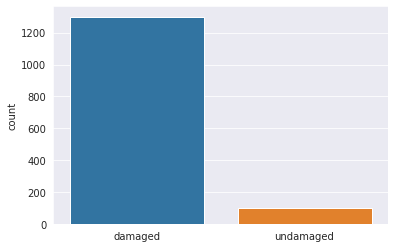

In [7]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("damaged")
    else:
        l.append("undamaged")
seaborn.set_style('darkgrid')
seaborn.countplot(l)

In [8]:
x_train = []
y_train = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

# Normalize the data
x_train = numpy.array(x_train) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = numpy.array(y_train)

In [9]:
numpy.unique(y_train)

array([0, 1])

### Smote Oversampling

In [10]:
x_train.shape

(1399, 224, 224, 3)

In [11]:
ReX_train = x_train.reshape(1399, 224 * 224 * 3)
ReX_train.shape

(1399, 150528)

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train2, y_train2 = smote.fit_resample(ReX_train,y_train)
x_train2.shape,y_train2.shape

((2600, 150528), (2600,))

In [13]:
x_train2 = x_train2.reshape(-1,224,224,3)
x_train2.shape

(2600, 224, 224, 3)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

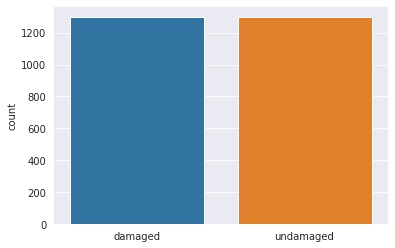

In [14]:
l = []
for i in y_train2:
    if(i == 0):
        l.append("damaged")
    else:
        l.append("undamaged")
seaborn.set_style('darkgrid')
seaborn.countplot(l)

# Models

In [15]:
def simple_model():
    model = Sequential()
    model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
    model.add(MaxPool2D())

    model.add(Conv2D(32, 3, padding="same", activation="relu"))
    model.add(MaxPool2D())

    model.add(Conv2D(64, 3, padding="same", activation="relu"))
    model.add(MaxPool2D())
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128,activation="relu"))
    model.add(Dense(2, activation="softmax"))
    print('Simple Model')
    model.summary()
    return model

In [16]:
# xception model

import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,Add
from tensorflow.keras.layers import SeparableConv2D,ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras import Model
# creating the Conv-Batch Norm block

def conv_bn(x, filters, kernel_size, strides=1):
    
    x = Conv2D(filters=filters, 
               kernel_size = kernel_size, 
               strides=strides, 
               padding = 'same', 
               use_bias = False)(x)
    x = BatchNormalization()(x)
    return x

# creating separableConv-Batch Norm block

def sep_bn(x, filters, kernel_size, strides=1):
    
    x = SeparableConv2D(filters=filters, 
                        kernel_size = kernel_size, 
                        strides=strides, 
                        padding = 'same', 
                        use_bias = False)(x)
    x = BatchNormalization()(x)
    return x

# entry flow

def entry_flow(x):
    
    x = conv_bn(x, filters =32, kernel_size =3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters =64, kernel_size =3, strides=1)
    tensor = ReLU()(x)
    
    x = sep_bn(tensor, filters = 128, kernel_size =3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 128, kernel_size =3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=128, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=256, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=728, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    return x

# middle flow

def middle_flow(tensor):
    
    for _ in range(8):
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])
        
    return tensor

def exit_flow(tensor):
    
    x = ReLU()(tensor)
    x = sep_bn(x, filters = 728,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 1024,  kernel_size=3)
    x = MaxPool2D(pool_size = 3, strides = 2, padding ='same')(x)
    
    tensor = conv_bn(tensor, filters =1024, kernel_size=1, strides =2)
    x = Add()([tensor,x])
    
    x = sep_bn(x, filters = 1536,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 2048,  kernel_size=3)
    x = GlobalAvgPool2D()(x)
    
    x = Dense (units = 2, activation = 'softmax')(x)
    
    return x

def xception_model():
#     shape = 299 preferred
    input = Input(shape = (224,224,3))
    x = entry_flow(input)
    x = middle_flow(x)
    output = exit_flow(x)

    model = Model (inputs=input, outputs=output)
#     model.summary()
    return model

## Training

In [17]:
epochs = 200
model = xception_model()
model.compile(optimizer = Adam() , loss = tflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
history = model.fit(x=x_train2, y=y_train2, epochs=epochs, verbose=1, validation_split=0.2, workers=2)

Epoch 1/200
65/65 [==============================] - 37s 448ms/step - loss: 1.1236 - accuracy: 0.6622 - val_loss: 1.1975 - val_accuracy: 0.0000e+00
Epoch 2/200
65/65 [==============================] - 27s 421ms/step - loss: 0.4321 - accuracy: 0.8096 - val_loss: 1.3253 - val_accuracy: 0.0000e+00
Epoch 3/200
65/65 [==============================] - 27s 422ms/step - loss: 0.2618 - accuracy: 0.8996 - val_loss: 1.2470 - val_accuracy: 0.0000e+00
Epoch 4/200
65/65 [==============================] - 27s 421ms/step - loss: 0.1950 - accuracy: 0.9291 - val_loss: 1.5364 - val_accuracy: 0.0000e+00
Epoch 5/200
65/65 [==============================] - 27s 422ms/step - loss: 0.1143 - accuracy: 0.9642 - val_loss: 1.5894 - val_accuracy: 0.0000e+00
Epoch 6/200
65/65 [==============================] - 27s 423ms/step - loss: 0.1053 - accuracy: 0.9598 - val_loss: 1.7968 - val_accuracy: 0.0000e+00
Epoch 7/200
65/65 [==============================] - 27s 422ms/step - loss: 0.0615 - accuracy: 0.9754 - val_loss

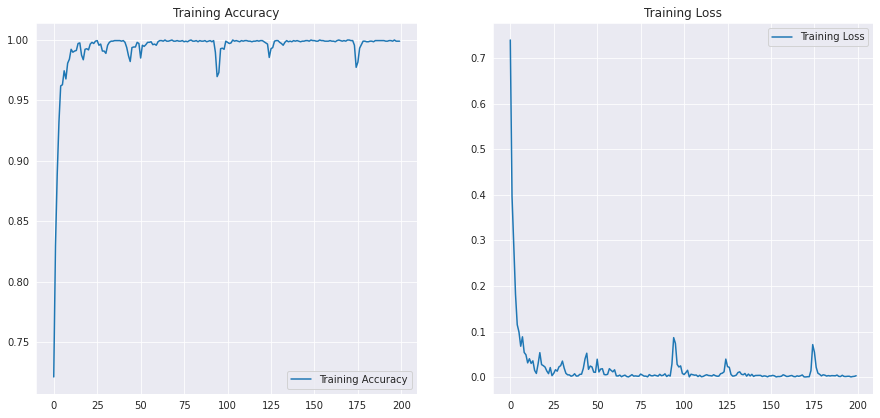

In [18]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(epochs)

pyplot.figure(figsize=(15, 15))
pyplot.subplot(2, 2, 1)
pyplot.plot(epochs_range, acc, label='Training Accuracy')
pyplot.legend(loc='lower right')
pyplot.title('Training Accuracy')

pyplot.subplot(2, 2, 2)
pyplot.plot(epochs_range, loss, label='Training Loss')
pyplot.legend(loc='upper right')
pyplot.title('Training Loss')
pyplot.show()

## Prediction

In [19]:
test =[]
import pandas
import os
path = '/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages'
for img in os.listdir(path):
    test.append(img)
test = pandas.DataFrame(test)
test.to_csv('imgs.csv')

In [20]:
test =[]
path = '/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/testImages'
for img in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
    test.append(resized_arr)
test = numpy.array(test) / 255
test.reshape(-1, img_size, img_size, 1)
test.shape

(600, 224, 224, 3)

In [21]:
y_prob.shape

NameError: name 'y_prob' is not defined

In [22]:
y_prob = model.predict(test) 
y_classes = y_prob.argmax(axis=-1)
predictions = y_classes.reshape(1,-1)[0]
pred_df = pandas.DataFrame(predictions)
pred_df.to_csv('predict.csv')

In [23]:
pred_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [24]:
test_df = pandas.read_csv('/kaggle/input/fast-furious-and-insured/Fast_Furious_Insured/test.csv')
test_df

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.00
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.00
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.00
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.00
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.00
...,...,...,...,...,...,...
595,img_7766518.jpg,B,30900,772.5,2024-10-23,7803.00
596,img_4535713.jpg,O,51300,1282.5,2025-02-21,12903.00
597,img_4511787.jpg,BQ,27000,675.0,2023-07-13,23527.68
598,img_4517592.jpg,AA,42600,1065.0,2024-05-05,10728.00


In [25]:
pred_df.columns = ['Condition']
combo= pandas.concat(objs= [test_df,pred_df], axis = 1)
combo

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.00,0
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.00,0
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.00,0
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.00,0
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.00,0
...,...,...,...,...,...,...,...
595,img_7766518.jpg,B,30900,772.5,2024-10-23,7803.00,0
596,img_4535713.jpg,O,51300,1282.5,2025-02-21,12903.00,0
597,img_4511787.jpg,BQ,27000,675.0,2023-07-13,23527.68,0
598,img_4517592.jpg,AA,42600,1065.0,2024-05-05,10728.00,0


In [26]:
combo.to_csv('test.csv')
train_df.to_csv('train.csv')